In [105]:
import pandas as pd
import seaborn as sns
import dateparser
from pyprojroot.here import here
import matplotlib.pyplot as plt
from zodiac_sign import get_zodiac_sign

colors = sns.color_palette("Set2")

In [127]:
df_degrees = pd.read_csv(here("join/output/degrees.csv"))
df_employment = pd.read_csv(here("join/output/employment.csv"))
df_honors = pd.read_csv(here("join/output/honors.csv"))
df_visits = pd.read_csv(here("join/output/visits.csv"))
df_parents = pd.read_csv(here("join/output/parents.csv"))
df_people = pd.read_csv(here("join/output/personal.csv"))

In [128]:
print(df_people.shape)

df_people.head()

(228, 6)


,full_name,birthdate,deathdate,birthplace,birthyear,deathyear
0,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0
1,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0
2,Anna Margaret Mullikin,"March 7, 1893","August 24, 1975","Baltimore, Maryland",1893,1975.0
3,Mary Frances Winston Newson,"August 7, 1869","December 5, 1959","Forreston, Illinois",1869,1959.0
4,Annie Louise MacKinnon Fitch,"June 1, 1868","September 12, 1940","Woodstock, Ontario, Canada",1868,1940.0


In [129]:
def coarsen_degree_type(degree_type):
    if degree_type in ['PhD', 'PhB']:
        return 'PhD'

    elif degree_type in ['MA', 'MS', 'ML']:
        return 'Masters'

    elif degree_type in ['BA', 'BS', 'BEd', 'BL', 'BSc']:
        return 'Bachelors'

    return 'Other'

In [130]:
df_degrees['degree_type_coarsened'] = df_degrees.degree_type.apply(coarsen_degree_type)

df_degrees['degree_type_coarsened'].value_counts()

degree_type_coarsened
PhD          235
Bachelors    227
Masters      202
Other          2
Name: count, dtype: int64

In [131]:
df_degrees_wide = df_degrees[df_degrees.degree_type_coarsened != 'Other'].sort_values(by=['full_name', 'degree_year']).drop_duplicates(subset=['full_name', 'degree_type_coarsened']).pivot(index='full_name', columns='degree_type_coarsened', values='degree_year')
df_degrees_wide = df_degrees_wide.rename(columns={'PhD': 'phd_year', 'Bachelors': 'bachelors_year', 'Masters': 'masters_year'})
df_degrees_wide = df_degrees_wide.reset_index()
df_degrees_wide.head()

degree_type_coarsened,full_name,bachelors_year,masters_year,phd_year
0,Abba Verbeck Newton,1929.0,1931.0,1933.0
1,Ada Isabel Maddison,1893.0,NaN,1896.0
2,Adrienne Sophie Rayl,1924.0,1934.0,1939.0
3,Agnes Sime Baxter,1891.0,1892.0,1895.0
4,Alice Madeleine Dimick,1899.0,1900.0,1905.0


In [132]:
df_personal = df_people.merge(df_degrees_wide, on=['full_name'])
df_personal['bachelors_age'] = df_personal.bachelors_year - df_personal.birthyear
df_personal['masters_age'] = df_personal.masters_year - df_personal.birthyear
df_personal['phd_age'] = df_personal.phd_year - df_personal.birthyear

df_personal.head()

,full_name,birthdate,deathdate,birthplace,birthyear,deathyear,bachelors_year,masters_year,phd_year,bachelors_age,masters_age,phd_age
0,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,1929.0,1930.0,1933.0,36.0,37.0,40.0
1,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,1920.0,1926.0,1930.0,21.0,27.0,31.0
2,Anna Margaret Mullikin,"March 7, 1893","August 24, 1975","Baltimore, Maryland",1893,1975.0,1915.0,1919.0,1922.0,22.0,26.0,29.0
3,Mary Frances Winston Newson,"August 7, 1869","December 5, 1959","Forreston, Illinois",1869,1959.0,1889.0,NaN,1897.0,20.0,NaN,28.0
4,Annie Louise MacKinnon Fitch,"June 1, 1868","September 12, 1940","Woodstock, Ontario, Canada",1868,1940.0,1889.0,1891.0,1894.0,21.0,23.0,26.0


In [133]:
df_employment['nth_job'] = df_employment.groupby('full_name').employer.transform('cumcount') + 1

df_employment_personal = df_employment.merge(df_personal.drop(['birthdate', 'deathdate', 'birthplace', 'birthyear', 'deathyear'], axis=1), on='full_name')
df_employment_personal.head(15)

,employer,job_title,job_year_begin,job_year_end,reason_end,full_name,birthdate,deathdate,birthplace,birthyear,deathyear,nth_job,bachelors_year,masters_year,phd_year,bachelors_age,masters_age,phd_age
0,Various schools in Kansas,Teacher,NaN,1929,Entered Catholic University for graduate work,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,1,1929.0,1930.0,1933.0,36.0,37.0,40.0
1,"Marymount College, Salina, Kansas",Director of the Mathematics Department,1932,1966,Retirement,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,2,1929.0,1930.0,1933.0,36.0,37.0,40.0
2,"Sacred Heart High School, Salina",Teacher,1966,NaN,NaN,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,3,1929.0,1930.0,1933.0,36.0,37.0,40.0
3,"Notre Dame High School, Concordia",Teacher,NaN,NaN,NaN,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,4,1929.0,1930.0,1933.0,36.0,37.0,40.0
4,"Central Catholic High School, Grand Island, Ne...",Part-time Worker,NaN,NaN,NaN,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,5,1929.0,1930.0,1933.0,36.0,37.0,40.0
5,Burlington High School,Teacher,1920,1922,NaN,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,1,1920.0,1926.0,1930.0,21.0,27.0,31.0
6,Dodge City High School,Teacher,1923,1924,NaN,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,2,1920.0,1926.0,1930.0,21.0,27.0,31.0
7,Ozark Wesleyan College,Teacher,1926,1927,College closed in 1932,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,3,1920.0,1926.0,1930.0,21.0,27.0,31.0
8,Nebraska State Normal College,Teacher,1928,1929,NaN,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,4,1920.0,1926.0,1930.0,21.0,27.0,31.0
9,Fort Hays Kansas State College,Instructor,1930,1931,NaN,Beatrice Liberty Hagen,"July 4, 1899","July 22, 1987","Barton County, near Ellinwood, Kansas",1899,1987.0,5,1920.0,1926.0,1930.0,21.0,27.0,31.0


In [135]:
df_employment_personal[df_employment_personal.job_year_begin.isnull()]

,employer,job_title,job_year_begin,job_year_end,reason_end,full_name,birthdate,deathdate,birthplace,birthyear,deathyear,nth_job,bachelors_year,masters_year,phd_year,bachelors_age,masters_age,phd_age
0,Various schools in Kansas,Teacher,NaN,1929,Entered Catholic University for graduate work,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,1,1929.0,1930.0,1933.0,36.0,37.0,40.0
3,"Notre Dame High School, Concordia",Teacher,NaN,NaN,NaN,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,4,1929.0,1930.0,1933.0,36.0,37.0,40.0
4,"Central Catholic High School, Grand Island, Ne...",Part-time Worker,NaN,NaN,NaN,Sister Mary Nicholas Arnoldy,"March 7, 1893","September 28, 1985","Tipton, Kansas",1893,1985.0,5,1929.0,1930.0,1933.0,36.0,37.0,40.0
168,Army Ordnance Department,Associated with F. R. Moulton,NaN,NaN,NaN,Caroline Eustis Seely,"August 3, 1887","May 17, 1961","Delhi, New York",1887,1961.0,2,1911.0,1912.0,1915.0,24.0,25.0,28.0
190,Riding Camps for Girls,Instructor of Equitation,NaN,NaN,NaN,Gertrude Stith Ketchum,"August 4, 1903","September 27, 1958","near Nunez, Georgia",1903,1958.0,5,1924.0,1928.0,1934.0,21.0,25.0,31.0
209,New Hampshire public district schools,Teacher,NaN,NaN,NaN,Josephine Alberta Robinson Roe,"May 5, 1858","April 29, 1946","Meredith, New Hampshire",1858,1946.0,1,1894.0,1911.0,1918.0,36.0,53.0,60.0
558,Swarthmore College,Mathematics Instructor,NaN,NaN,End of V-12 program,Anna Marguerite Marie Lehr,"October 22, 1898","December 14, 1987","Baltimore, Maryland",1898,1987.0,7,1919.0,NaN,1925.0,21.0,NaN,27.0
563,Chowchilla School District,Teacher,NaN,NaN,Death,Mary Helen Sagal (Sznyter),"June 21, 1893","March 24, 1975","Woodhaven, New York",1893,1975.0,1,1915.0,1916.0,1918.0,22.0,23.0,25.0
597,"Notre Dame Academy, Cincinnati",High School Teacher,NaN,1901,Transferred to Trinity College,Sister Marie Cecilia Mangold,"December 5, 1872","February 9, 1934","Cincinnati, Ohio",1872,1934.0,1,1910.0,1914.0,1929.0,38.0,42.0,57.0
657,Catholic elementary schools in Texas and Missouri,Teacher,NaN,NaN,Moved to high school teaching,Sister Mary de Lellis,"February 15, 1892","April 7, 1983","Kilmore, County Wexford, Ireland",1892,1983.0,1,1920.0,1923.0,1931.0,28.0,31.0,39.0


In [136]:
df_employment_personal[df_employment_personal.full_name == 'Laura Louise Rosenbaum']

,employer,job_title,job_year_begin,job_year_end,reason_end,full_name,birthdate,deathdate,birthplace,birthyear,deathyear,nth_job,bachelors_year,masters_year,phd_year,bachelors_age,masters_age,phd_age
1447,High Schools in Eastern Colorado,High School Teacher,1928,1930,Returned to University of Colorado for graduat...,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,1,1928.0,1933.0,1939.0,20.0,25.0,31.0
1448,University of Colorado,Assistant in Mathematics,1930,1932,Continued graduate studies,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,2,1928.0,1933.0,1939.0,20.0,25.0,31.0
1449,University of Colorado,Instructor in Extension Division,1932,1939,Completed PhD,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,3,1928.0,1933.0,1939.0,20.0,25.0,31.0
1450,Civilian Conservation Corps Camp,Mathematics Teacher,early 1930s,early 1930s,Temporary teaching position,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,4,1928.0,1933.0,1939.0,20.0,25.0,31.0
1451,Reed College,Instructor,1940,1943,Promoted to Assistant Professor,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,5,1928.0,1933.0,1939.0,20.0,25.0,31.0
1452,Reed College,Assistant Professor,1943,1953,Moved to Connecticut,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,6,1928.0,1933.0,1939.0,20.0,25.0,31.0
1453,"Trinity College, Hartford",Visiting Faculty,NaN,NaN,Temporary appointment,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,7,1928.0,1933.0,1939.0,20.0,25.0,31.0
1454,"Connecticut College, New London",Visiting Faculty,NaN,NaN,Temporary appointment,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,8,1928.0,1933.0,1939.0,20.0,25.0,31.0
1455,Smith College,Visiting Faculty,1973,1974,Temporary appointment,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,9,1928.0,1933.0,1939.0,20.0,25.0,31.0
1456,"Saint Joseph College, West Hartford",Professor,NaN,NaN,Temporary appointment,Laura Louise Rosenbaum,"January 21, 1908","January 16, 1980","Carrollton, Illinois",1908,1980.0,10,1928.0,1933.0,1939.0,20.0,25.0,31.0


In [138]:
df_employment_personal.to_csv(here("analyze/output/employment_with_dates.csv"), index=False)

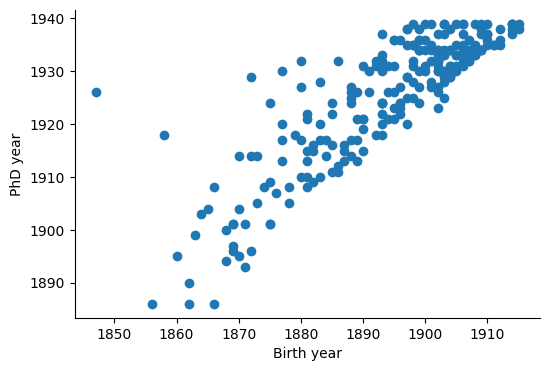

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(df_personal.birthyear, df_personal.phd_year)
ax.set_xlabel("Birth year")
ax.set_ylabel("PhD year")
sns.despine()

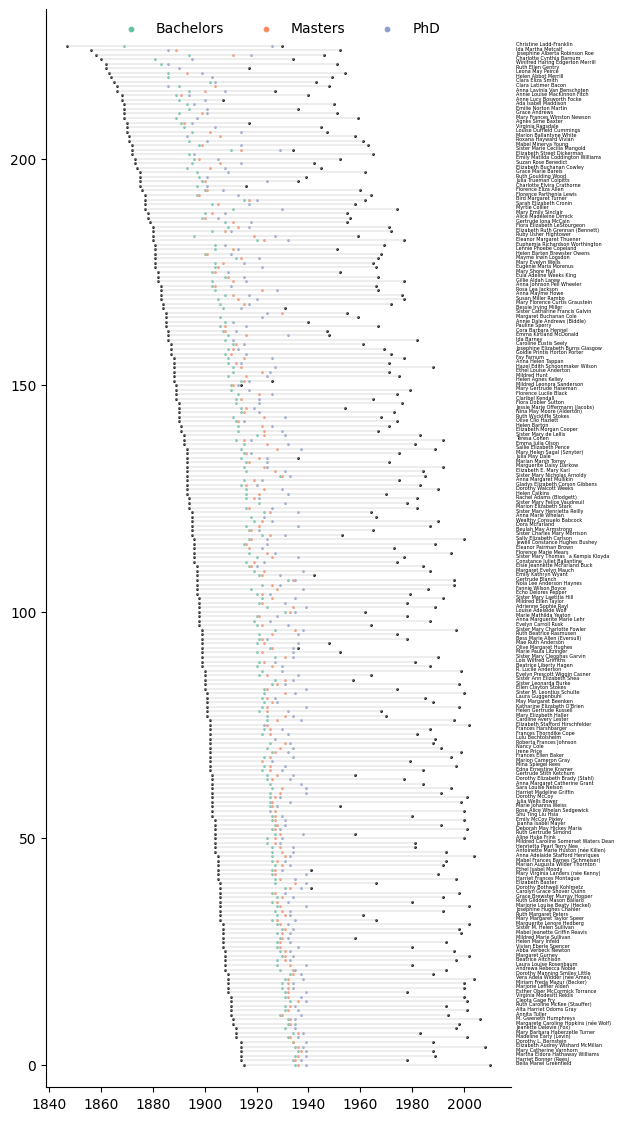

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(6, 14))

ax.scatter(row.bachelors_year, -100, color=colors[0], s=10, label='Bachelors')
ax.scatter(row.masters_year, -100, color=colors[1], s=10, label='Masters')
ax.scatter(row.phd_year, -100, color=colors[2], s=10, label='PhD')

for i, row in df_personal.dropna(subset=['birthyear', 'deathyear']).sort_values(by='birthyear', ascending=False).reset_index().iterrows():
    ax.scatter(row.birthyear, i, color='black', s=1)
    ax.scatter(row.deathyear, i, color='black', s=1)

    ax.scatter(row.bachelors_year, i, color=colors[0], s=1)
    ax.scatter(row.masters_year, i, color=colors[1], s=1)
    ax.scatter(row.phd_year, i, color=colors[2], s=1)
    ax.plot((row.birthyear, row.deathyear), (i, i), color='lightgray', alpha=0.4)
    ax.text(2020, i, row.full_name, fontsize=3.5)

ax.set_ylim([-5, len(df_personal) + 5])
ax.legend(ncol=3, loc='upper center', frameon=False)
sns.despine()

plt.savefig(here("analyze/output/dates.pdf"), bbox_inches="tight")

In [108]:
df_personal['birthdate'].apply(dateparser.parse).apply(get_zodiac_sign).value_counts()

birthdate
Libra          29
Leo            23
Gemini         22
Sagittarius    22
Aries          21
Aquarius       18
Scorpio        17
Pisces         16
Cancer         16
Virgo          16
Taurus         15
Capricorn      13
Name: count, dtype: int64